# Session 7: Working with spatial data and applications for econometrics

By *Andreas Bjerre-Nielsen*

*Note: Due to the sudden demand for remote learning, we are experimenting with different ways of creating a good
remote learning experience. Therefore your feedback and suggestions are encouraged. You can give feedback
by reaching out to a teacher. This notebook contains a mix of relevant questions and mini lectures interweaved. It is important to note that we will probably iterate on this format, so we ask for your patience when we mess up.*



#### Agenda

In the lecture we will cover the following points.

1. [Spatial data fundamentals](#Part-1:-Spatial-data-fundamentals)
    - [Introduction and motivation](#Introduction-and-motivation)
    - [Geometric shapes in 2d](#Geometric-shapes-in-2d)    
    - [Measurement for spatial data](#Measurement-for-spatial-data)    
1. [Structuring spatial data: Geopandas](#Part-2:-Structuring-spatial-data:-Geopandas)
    - [Spatial data structures](#Spatial-data-structures)
    - [Map making](#Map-making)    
    - [Spatial operations](#Spatial-operations)
    - [Interpolation of spatial data](#Spatial-interpolation)
1. Spatial data applications

#### Spatial Python packages

Use conda to install the following packages through anaconda prompt/terminal
```
conda install geopandas descartes
conda install -c conda-forge folium
```


<br><br><br>

# Part 1: Spatial data fundamentals

#### Introduction and motivation 

We start out with a short introduction to the subject and provide some applications of spatial data.

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('GWiAafFMfy4', width=640, height=360)

#### Geometric shapes in 2d

Often we learn best when we do things ourselves therefore we start with a brief tutorial. We all have an intuitive understanding of spatial shapes including classic, two dimensional shapes  such as lines, circles, squares etc. These spatial shapes, and many more, can be created from some from generic geometric objects. There are four essential ones:
- Point
- LineString
- Polygon 
- Multipolygon
    
We load them in Python using `shapely.geometry` and we describe them in detail below.

In [1]:
from shapely.geometry import Point, LineString, Polygon, MultiPolygon

We also load standard packages and some new spatial ones (see installation guide above).

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

# spatial stuff
import geopandas as gpd
import fiona
import folium
import shapely

def convert_to_danish_crs(df):
    df.to_crs(epsg=25832, inplace=True)

We now want to see how to use the geometric objects. 

Since points are obvious, we start with `LineString` objects. These are sequences of points that are not required to begin and end in the same point. Between each pair of consecutive points a line is drawn. Execute the code below to see an example.

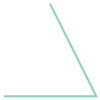

In [16]:
line_coords = np.array([(0,0),(2,0),(1,2)])

LineString(line_coords)

We move on to making a triangle using a `Polygon` object. To make the polygon we use the same line coordinates from above. The Polygon requires that the sequence has the same beginning and end, so a final line between [0,0] and [1,2] is added. Execute the code below to see an example.

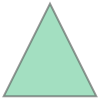

In [17]:
triangle = Polygon(line_coords)
triangle

The final geometric object is a `MultiPolygon`. This object can contain one or more points, line strings and polygons. Note it can also contain an interior in polygons, e.g. like a courtyard within a building. Execute the code below to see an example.

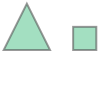

In [18]:
square = Polygon(np.array([[3,0],[3,1],[4,1],[4,0]]))

MultiPolygon([triangle, square])

#### Measurement for spatial data

The above tutorial gave a basic understanding of using geometric objects in a coordinate space. The video below gives a brief introduction to what such coordinate systems capture.

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('fewTYGENHeA', width=640, height=360)

#### Exercises

Here are some questions to make ensure you've grasped key points from lectures and/or readings. 

1. Explain how the  four generic geometric objects work and give an example of what spatial shapes they may contain.
1. Try modifying `n_points` in the code below by increasing it to 5, 6, 10, 20, 100. What happens to the displayed polygon - how is it changing? 
1. List two common coordinates reference systems (CRS) - one used in Denmark one used globally. Account for different properties CRS may have.

In [ ]:
n_points = 4
range_points = np.linspace(0, 2*np.pi, n_points)
unit_circle_points = [(np.cos(d),np.sin(d)) for d in range_points]
Polygon(unit_circle_points)

<br><br><br>

# Part 2: Structuring spatial data: Geopandas
#### Spatial data structures

An extension of `pandas` is called `geopandas` that comes with a suite of useful methods and data structures for spatial data. I talk about it in the video below.

In [ ]:
YouTubeVideo('vuxCmkKiRXs', width=640, height=360)

#### Map making
When we have loaded in spatial data we can plot it naturally like a map. The video below shows how to make simple plots using geopandas. Plots can also be made interactiv and zoomable using a package called `folium`.

In [ ]:
YouTubeVideo('0g1cO2XN9VA', width=640, height=360)

#### Spatial operations 
We can perform various operations and procedures on spatial objects. For instance we can measure the (shortest) distance between points, whether they overlap etc.

In [ ]:
YouTubeVideo('4LGrecKjnNA', width=640, height=360)

#### Spatial interpolation
One standard use of spatial data is to compute various local measures, e.g. socioeconomic status, crime, etc. How should we aggregate data, e.g. individauls' socioeconomic status, crime events.

In [ ]:
YouTubeVideo('T0NSkLQPnws', width=640, height=360)

#### Exercises

We round off this part on structuring spatial data with a few exercises and questions.

1. Explain what is the difference between an ordinary `DataFrame` vs a `GeoDataFrame`. What new properties, columns are different?
1. Load the world_countries dataset (named *naturalearth_lowres*) that comes with `geopandas`. Select the African continent and plot it.
1. Suppose you have two evenly sized circles that partially overlaps. Make a drawing by hand of the union, intersection and difference (subtracting the left most from the right most).
1. Suppose you are the secret police and have access to two datasets on a criminal organization: 1) location data on  from GPS for individuals over time 2) data on buildings where the criminals from the organization frequently meet. Explain how you can use geopandas to find out who are more likely among the individauls to be part of the criminal organization.
1. Play around with the voronoi plot function below - explain the relationship between 1-nearest neighbor and Voronoi plots. What happens if we use two or more neighbors?

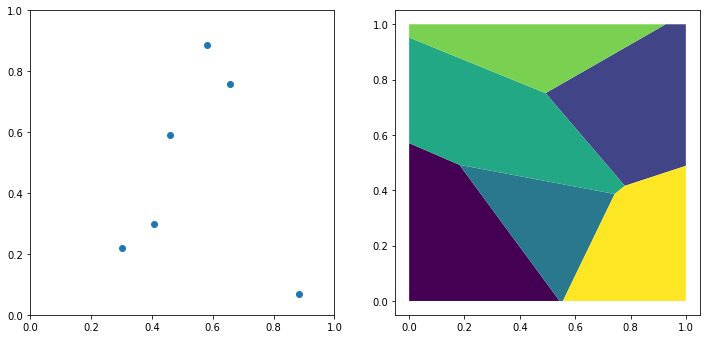

In [4]:
from voronoi import make_vor_plot
make_vor_plot()

<br><br><br>

# Part 3: Spatial data for econometrics

We finish the lecture by reviewing some econometric methods for using spatial data. We review three ways below; boundary discontinuites, quasi experiments and spatial econometrics.

#### Boundary discontinuity design

In this mini lecture we investigate how administrative boundaries can be can be cast as a regression discontinuity problem. This in turn allow us to make causal claims.

In [ ]:
YouTubeVideo('t5hhbne7GS8', width=640, height=360)

#### Quasi experiments with spatial data
We now move onto another way of using our econometric toolbox in conjunction with local spatial variation which allows to have other ways of establishing causal mechanisms.

In [ ]:
YouTubeVideo('AVIwKHKeo_o', width=640, height=360)

#### Spatial econometrics

We round off with spatial econometrics and review some of the issues it faces. 

In [ ]:
YouTubeVideo('CNwug2bzf5k', width=640, height=360)

#### Exercises
1. Gauge whether the assumption of selection unobservable hold for households across municipal and school disctrict boundaries.
1. Argue to what extend policies to curb coronavirus outbreak could be identified. Could the data on spreading be used in other ways as a natural experiment?
1. Describe why spatial econometrics may lead to biased estimates.
  - Note: it may be an advantage to revisit this question after we have covered peer effects.